In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [2]:
# Citation: Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J.-E., Aknin, L. B., & Wang, S. (Eds.). (2024). World Happiness Report 2024. University of Oxford: Wellbeing Research Centre.
df=pd.read_excel('DataForFigure2.1+with+sub+bars+2024.xls')
df.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.7407,7.814808,7.666591,1.844054,1.572367,0.694793,0.859294,0.141674,0.546158,2.082367
1,Denmark,7.5827,7.665297,7.500103,1.907798,1.520361,0.698944,0.822740,0.203579,0.548413,1.880887
2,Iceland,7.5251,7.617527,7.432673,1.880718,1.616525,0.718345,0.818509,0.258344,0.182473,2.050233
3,Sweden,7.3441,7.421563,7.266637,1.878146,1.500826,0.723871,0.838269,0.221455,0.523795,1.657707
4,Israel,7.3411,7.405165,7.277036,1.802934,1.512793,0.739816,0.641463,0.153205,0.192823,2.298026


In [76]:
dcode=pd.read_excel("C:/Users/rcadet/Documents/GitHub/BlogData/Trade/Migration/API_NY.GDP.MKTP.KD.ZG_DS2_en_excel_v2_5994685.xls")
dcode.columns=dcode.iloc[2,:]
dcode=dcode.iloc[3:,:]
dcode=dcode[['Country Name','Country Code']]
dcode.head(3)

2,Country Name,Country Code
3,Aruba,ABW
4,Africa Eastern and Southern,AFE
5,Afghanistan,AFG


In [79]:
dregion=pd.read_excel("C:/Users/rcadet/Documents/GitHub/BlogData/Trade/Migration/API_NY.GDP.MKTP.KD.ZG_DS2_en_excel_v2_5994685.xls",sheet_name="Metadata - Countries")
dregion=dregion[['Country Code','Region']]
dregion.head(3)

,Country Code,Region
0,ABW,Latin America & Caribbean
1,AFE,NaN
2,AFG,South Asia


In [86]:
df['Country Name']=df['Country name']
dd=pd.merge(pd.merge(df,dcode),dregion)
dd=dd[['Country Name','Country name','Country Code','Region','Ladder score']]
dd.head(5)

,Country Name,Country name,Country Code,Region,Ladder score
0,Finland,Finland,FIN,Europe & Central Asia,7.7407
1,Denmark,Denmark,DNK,Europe & Central Asia,7.5827
2,Iceland,Iceland,ISL,Europe & Central Asia,7.5251
3,Sweden,Sweden,SWE,Europe & Central Asia,7.3441
4,Israel,Israel,ISR,Middle East & North Africa,7.3411


In [119]:
dreg=pd.DataFrame(dd.groupby('Region')['Ladder score'].mean())
dreg.columns=['Mean']
dreg.index

Index(['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa'],
      dtype='object', name='Region')

In [244]:
list(reversed(np.arange(1,11,1)))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

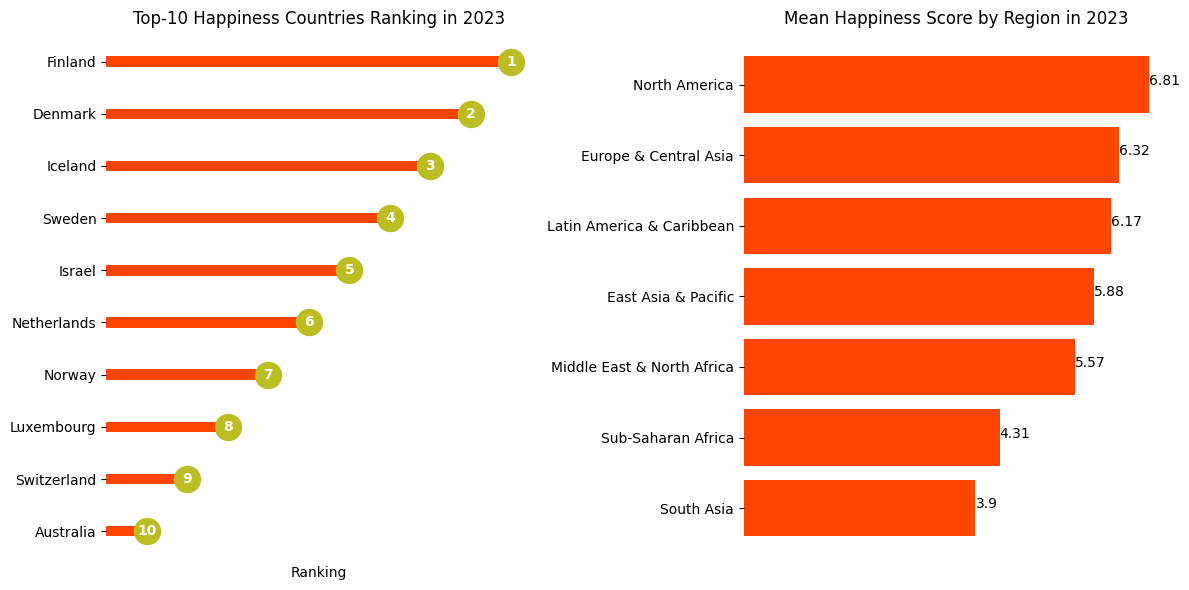

In [291]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df1=df.head(10)
# ax1.barh(df1['Country name'][::-1],df1['Ladder score'][::-1],height=0.2,color='tab:olive')
ax1.barh(df1['Country name'][::-1],list(np.arange(1,11,1)),height=0.2,color='orangered')
for i in range(10):
    ax1.scatter(y=df1['Country name'][::-1][i],x=list(np.arange(1,11,1))[::-1][i],color='tab:olive',s=350)
    # ax1.text(df1['Ladder score'][::-1][i],9-i, i+1, va='center', ha='center',color='white',weight='bold')
    ax1.text(10-i,df1['Country name'][::-1][i], i+1, va='center', ha='center',color='white',weight='bold')
ax1.set_title("Top-10 Happiness Countries Ranking in 2023")
ax1.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
ax1.set_xticks([])
ax1.set_xlabel('Ranking')

dreg=dreg.sort_values('Mean')
ax2.barh(dreg.index,dreg['Mean'],color='orangered')
for j in range(dreg.shape[0]):
    ax2.text(dreg['Mean'][j],dreg.index[j],round(dreg['Mean'][j],2))
ax2.set_title("Mean Happiness Score by Region in 2023")
ax2.set_xticks([])

ax2.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
plt.tight_layout()
plt.show()


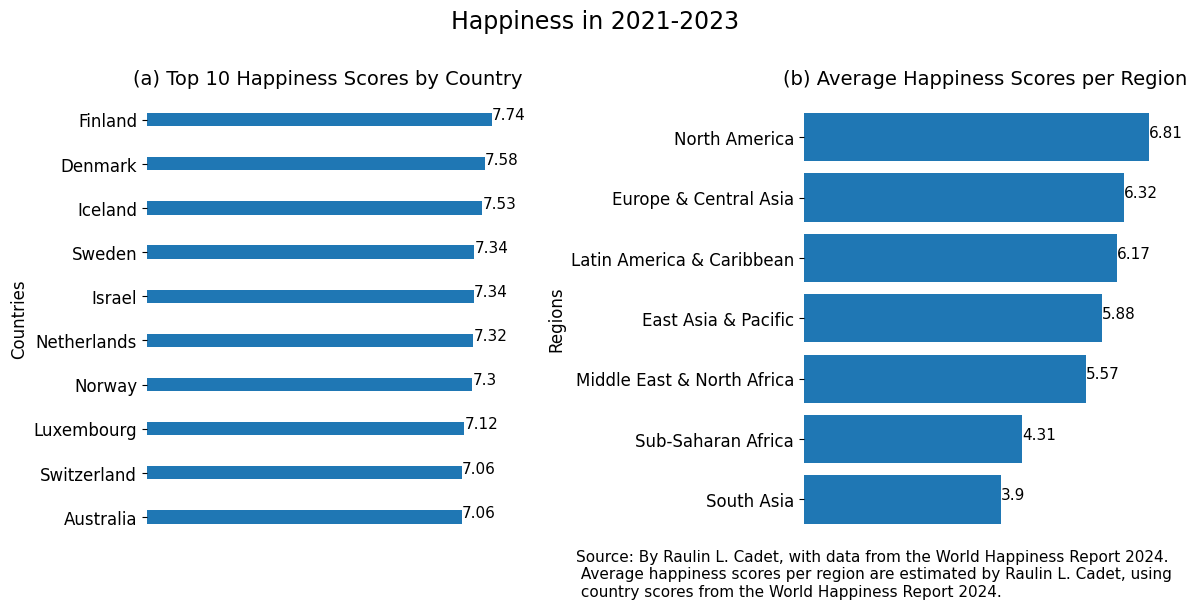

In [361]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df1=df.head(10)
# ax1.barh(df1['Country name'][::-1],df1['Ladder score'][::-1],height=0.2,color='tab:olive')
ax1.barh(df1['Country name'][::-1],df1['Ladder score'][::-1],height=0.3,color='tab:blue')
for i in range(10):
    # ax1.barh(df1['Country name'][::-1][i],df1['Ladder score'][::-1][i],height=0.2,color='orangered')
    ax1.text(df1['Ladder score'][::-1][i],df1['Country name'][::-1][i], round(df1['Ladder score'][::-1][i],2),fontsize=11)
ax1.set_title("(a) Top 10 Happiness Scores by Country",fontsize=14)
ax1.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
ax1.set_xticks([])
# ax1.set_xlabel('Score')

dreg=dreg.sort_values('Mean')
ax2.barh(dreg.index,dreg['Mean'],color='tab:blue')
for j in range(dreg.shape[0]):
    ax2.text(dreg['Mean'][j],dreg.index[j],round(dreg['Mean'][j],2),fontsize=11)
ax2.set_title("(b) Average Happiness Scores per Region",fontsize=14)
ax2.set_xticks([])
ax1.set_ylabel('Countries', fontsize=12)
ax1.tick_params(axis='y', labelsize=12)  # Set the font size of y-axis tick labels


ax2.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
ax2.set_ylabel('Regions', fontsize=12)
ax2.tick_params(axis='y', labelsize=12)  # Set the font size of y-axis tick labels

plt.suptitle('Happiness in 2021-2023',y=1.01,fontsize=17)
plt.text(-4.5,-1.6,s='Source: By Raulin L. Cadet, with data from the World Happiness Report 2024.\n Average happiness scores per region are estimated by Raulin L. Cadet, using\n country scores from the World Happiness Report 2024.',fontsize=11)

plt.tight_layout()
plt.show()